In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn import preprocessing
import math
from sklearn.model_selection import train_test_split
from sklearn import cross_validation, metrics     
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/home/tapas/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/tapas/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/tapas/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
import os
os.chdir('/home/tapas/HR_Analytics')

In [4]:
df = pd.read_csv('HR_data.csv')
le = preprocessing.LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition']) #Attrition column contains only object values.
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df = df.select_dtypes(exclude=['object'])

In [6]:
# Dividing the data into quantiles and doing the outlier analysis.

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Age                           0
Attrition                   237
DailyRate                     0
DistanceFromHome              0
Education                     0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobSatisfaction               0
MonthlyIncome               114
MonthlyRate                   0
NumCompaniesWorked           52
PercentSalaryHike             0
PerformanceRating           226
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel             85
TotalWorkingYears            63
TrainingTimesLastYear       238
WorkLifeBalance               0
YearsAtCompany              104
YearsInCurrentRole           21
YearsSinceLastPromotion     107
YearsWithCurrManager         14
dtype: int64

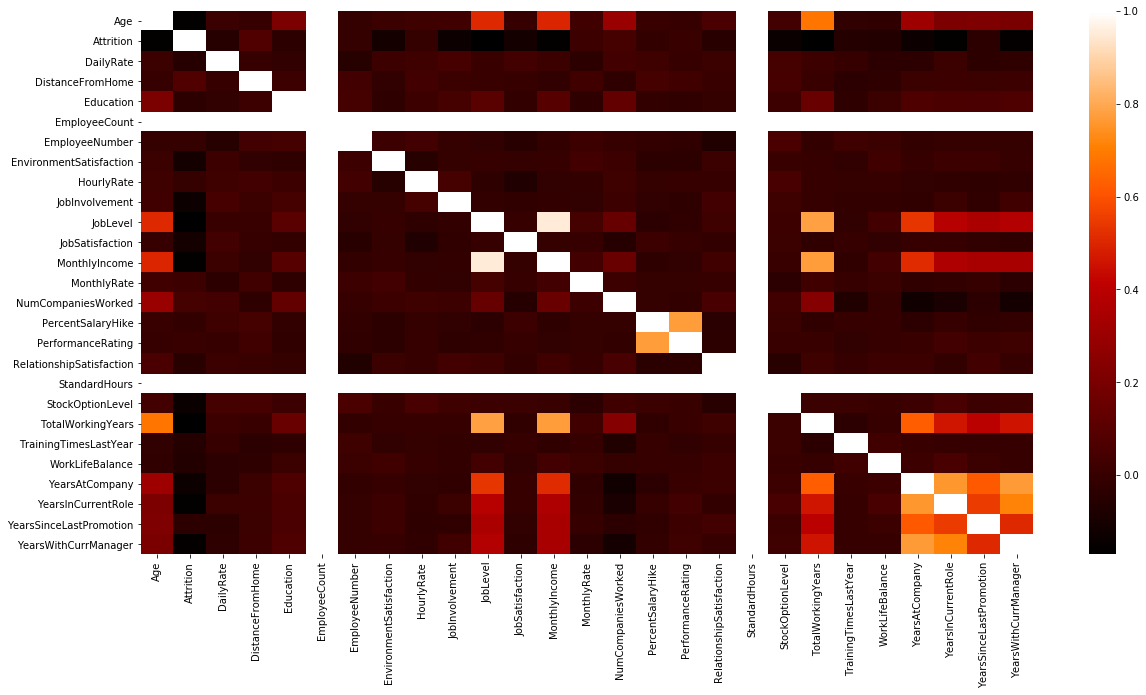

In [7]:
# Heatmap showing the correlation of various columns with each other.

ax = plt.figure(figsize = (20,10))
ax = sns.heatmap(df.corr(),cmap = 'gist_heat')

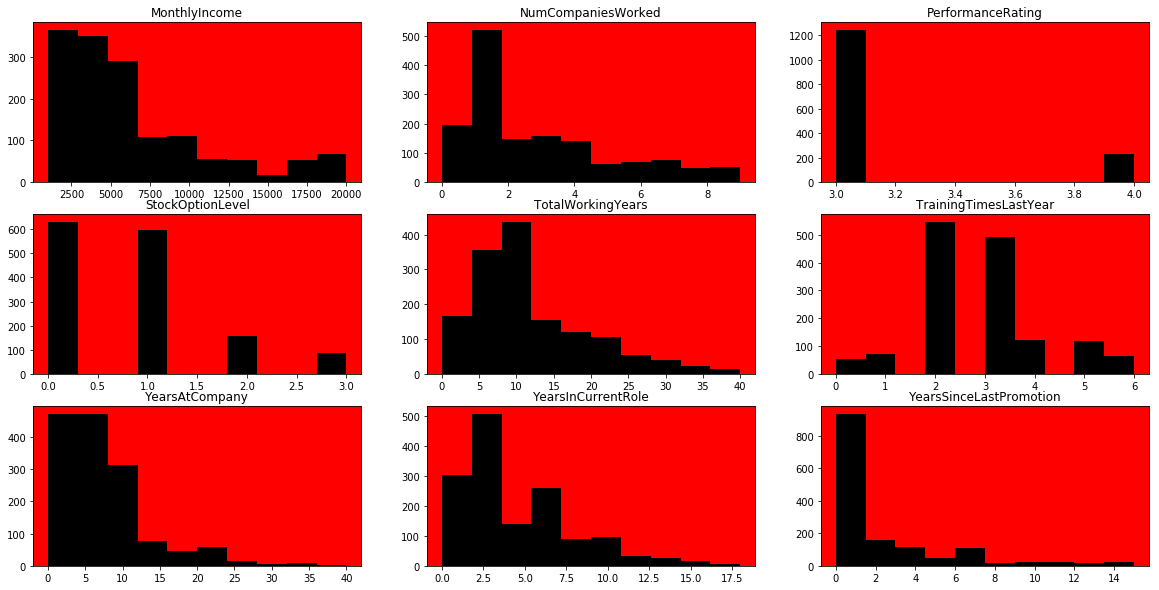

In [8]:
# The features with skewed or non-normal distribution.
skew_df = df[['MonthlyIncome','NumCompaniesWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']]
fig , ax = plt.subplots(3,3,figsize = (20,10))
col = skew_df.columns
for i in range(3):
    for j in range(3):
        ax[i][j].hist(skew_df[col[3 * i + j]] , color = 'k')
        ax[i][j].set_title(str(col[3 * i + j]))
        ax[i][j].set_axis_bgcolor((1, 0, 0))

In [9]:
target = df['Attrition']
train = df.drop('Attrition',axis = 1)
train.shape

(1470, 26)

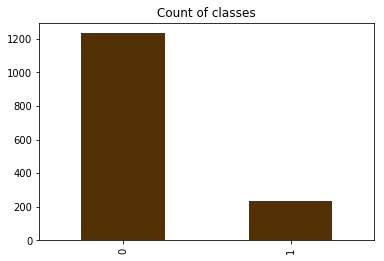

In [10]:
pd.value_counts(target).plot(kind = 'bar',cmap = 'BrBG')
plt.rcParams['axes.facecolor'] = 'blue'
plt.title("Count of classes")

In [24]:
train_accuracy = []
test_accuracy = []
models = ['Logistic Regression' , 'Decision Tree' , 'XgBoost']

In [12]:
#Defining a function which will give us train and test accuracy for each classifier.
def train_test_error(y_train,y_test):
    train_error = ((y_train==Y_train).sum())/len(y_train)*100
    test_error = ((y_test==Y_test).sum())/len(Y_test)*100
    train_accuracy.append(train_error)
    test_accuracy.append(test_error)
    print('{}'.format(train_error) + " is the train accuracy")
    print('{}'.format(test_error) + " is the test accuracy")

In [26]:
train.shape

(1470, 26)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(
    train, target, test_size=0.33, random_state=42)

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
train_predict = log_reg.predict(X_train)
test_predict = log_reg.predict(X_test)
y_prob = log_reg.predict(train)
y_pred = np.where(y_prob > 0.5, 1, 0)
train_test_error(train_predict , test_predict)

84.2479674796748 is the train accuracy
87.03703703703704 is the test accuracy


Confusion matrix, without normalization
[[1212   21]
 [ 197   40]]


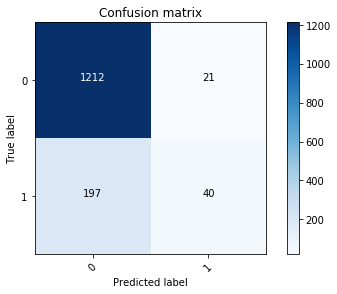

In [16]:
class_names = ['0', '1']
confusion_matrix=metrics.confusion_matrix(target,y_pred)
plot_confusion_matrix(confusion_matrix, classes=class_names,
                      title='Confusion matrix')

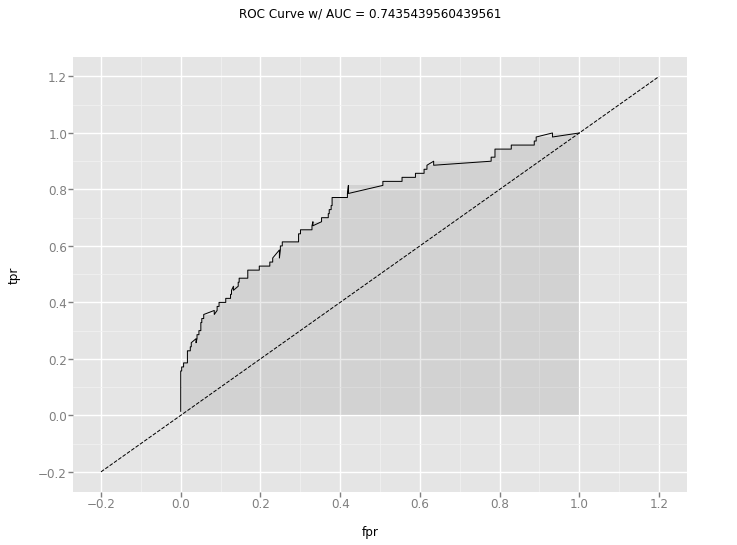

<ggplot: (8790904750137)>

In [17]:
probs = log_reg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr'))+ geom_line(aes(y = 'tpr')) + geom_abline(linetype = 'dashed') + geom_area(alpha = 0.1) + ggtitle("ROC Curve w/ AUC = %s" % str(roc_auc)) 

### Decision Tree

In [18]:
from sklearn import tree
dec = tree.DecisionTreeClassifier()
dec.fit(X_train,Y_train)
train_predict = dec.predict(X_train)
test_predict = dec.predict(X_test)
train_test_error(train_predict , test_predict)

100.0 is the train accuracy
76.95473251028807 is the test accuracy


Confusion matrix, without normalization
[[351  65]
 [ 47  23]]


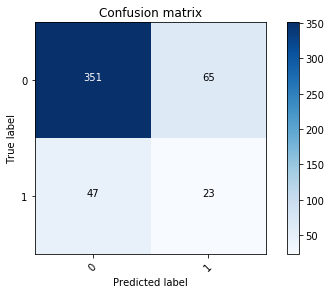

In [19]:
confusion_matrix=metrics.confusion_matrix(Y_test,test_predict)
plot_confusion_matrix(confusion_matrix, classes=class_names,
                      title='Confusion matrix')

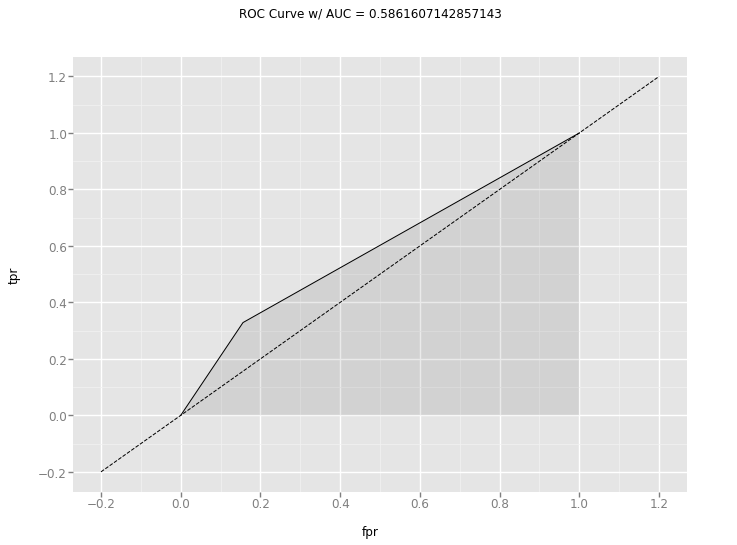

<ggplot: (-9223363245949816793)>

In [20]:
probs = dec.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr'))+ geom_line(aes(y = 'tpr')) + geom_abline(linetype = 'dashed') + geom_area(alpha = 0.1) + ggtitle("ROC Curve w/ AUC = %s" % str(roc_auc))

### Xgboost

In [21]:
import xgboost
from xgboost import XGBClassifier
XgB = XGBClassifier(max_depth=1,min_child_weight=1,gamma=0.0,subsample=0.8,colsample_bytree=0.75,reg_alpha=1e-05)
XgB.fit(X_train,Y_train)
train_predict = XgB.predict(X_train)
test_predict = XgB.predict(X_test)
train_test_error(train_predict,test_predict)

86.07723577235772 is the train accuracy
86.0082304526749 is the test accuracy


Confusion matrix, without normalization
[[409   7]
 [ 61   9]]


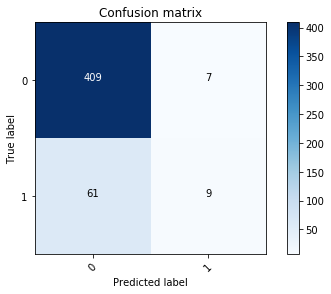

In [22]:
confusion_matrix=metrics.confusion_matrix(Y_test,test_predict)
plot_confusion_matrix(confusion_matrix, classes=class_names,
                      title='Confusion matrix')

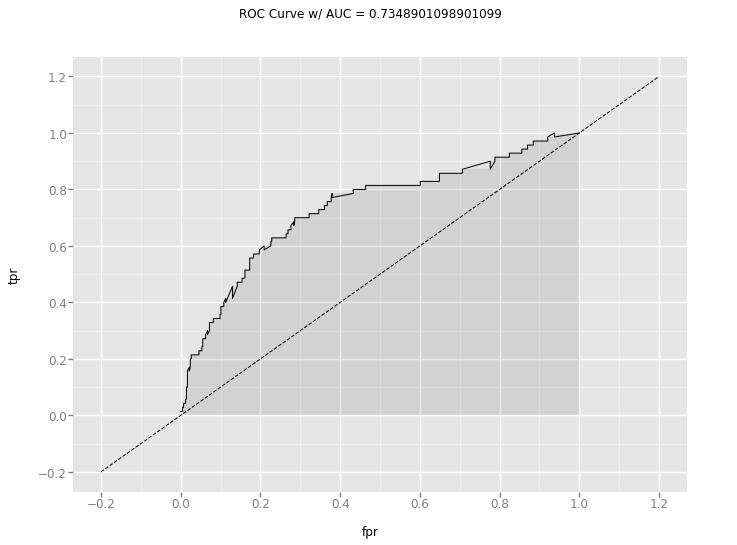

<ggplot: (8790896336006)>

In [23]:
probs = XgB.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr'))+ geom_line(aes(y = 'tpr')) + geom_abline(linetype = 'dashed') + geom_area(alpha = 0.1) + ggtitle("ROC Curve w/ AUC = %s" % str(roc_auc))